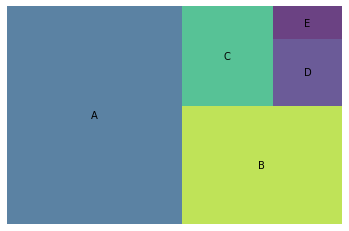

In [1]:
import matplotlib.pyplot as plt
import squarify

sizes = [50, 25, 12, 6, 3]
labels = ["A", "B", "C", "D", "E"]

squarify.plot(sizes=sizes, label=labels, alpha=.8)
plt.axis('off')
plt.show()

In [6]:
from colorama import init, Fore, Back, Style

init(autoreset=True)  # Initializes Colorama

print(Fore.RED + 'This text is red')
print(Back.GREEN + 'This text has a green background')
print(Style.BRIGHT + 'This text is bright')

This text is red
This text has a green background
This text is bright


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "Python is great for data visualization. Data visualization is fun with Python."

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ValueError: Only supported for TrueType fonts